# Preliminaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sys
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sys.path.append("/Users/paolo/Documents/methods/CMI_FS")
from feature_selection import forwardFeatureSelection

sys.path.append("/Users/paolo/Documents/methods/LinCFA")
from LinCFA import LinCFA

sys.path.append("/Users/paolo/Documents/methods/NonLinCFA")
from NonLinCFA import NonLinCFA

sys.path.append("/Users/paolo/Documents/Droughts/Paolo/regression_NonLinCFA")
from aux import standardize,unfold_dataset,compute_r2,prepare_target,prepare_features,aggregate_unfolded_data,FS_with_linearWrapper,compare_methods


In [2]:
def plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5):
    x = []
    y = []
    colors = cm.rainbow(np.linspace(0,1,len(output)))
    np.random.shuffle(colors)
    fig, ax = plt.subplots(2)
    ax[0].set_xlim(xmin,xmax)
    ax[1].set_xlim(xmin,xmax)
    ax[0].set_ylim(ymin,ymax)
    ax[1].set_ylim(ymin,ymax)
    for i in range(len(output)): 
        #print(len(output[i]))
        x = []
        y = []
        
        for datum in output[i]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[0].scatter(x,y,color=colors[i])
    
    x = []
    y = []
    col = cm.rainbow(np.linspace(0,1,len(selected_colnames)))
    for i in range(len(selected_colnames)): 
        idx = int(selected_colnames[i].split('_')[-1])
        for datum in output[idx]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[1].scatter(x,y,color=col[i])
    

In [4]:
### Nota: devo standardizzare tutto prima di chiamare LinCFA ma non serve validare
# infatti il metodo usa i dati per stimare i pesi della regressione lineare
# anche per CMI_FS non serve validare, usa i dati per quantificare l'informazione condivisa col target

# Target 

target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))


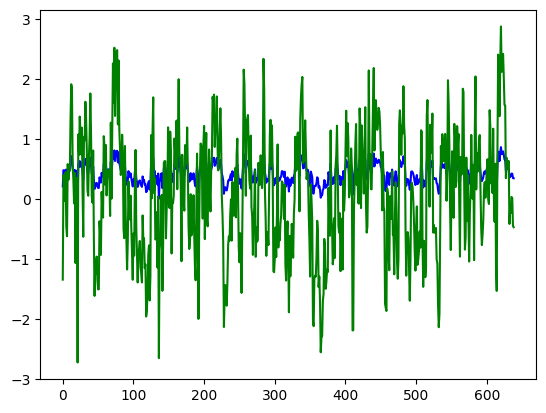

In [3]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')
plt.plot(target_df_trainVal.loc[:,'mean'], color='blue')
plt.plot(target_df_trainVal.loc[:,'mean_std'], color='green')

# 1) Only contemporary week: temperature, precipitation, both

## temperature

### wrapper and CMI

In [6]:
### what happens without considering the last years?
path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

for eps in [0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]:
    output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,
    ['cyclostationary_mean_tg','cyclostationary_mean_tg_1w',
       'cyclostationary_mean_tg_4w', 'cyclostationary_mean_tg_8w',
       'cyclostationary_mean_tg_12w', 'cyclostationary_mean_tg_16w',
       'cyclostationary_mean_tg_24w'],target_df_trainVal, eps=eps ,max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True)

    selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, min(50,len(output)-1), 228)

    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])
    
    
    ###########
    
    res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
    }
    
    res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
    selectedFeatures='selectedFeatures'
    print(f'\n{res[selectedFeatures]}\n')
    selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

    

Number of features: 991

Number of aggregated features: 9

Number of features: 991

Number of aggregated features: 10

Number of features: 991

Number of aggregated features: 13

Number of features: 991

Number of aggregated features: 13

Number of features: 991

Number of aggregated features: 10

Number of features: 991

Number of aggregated features: 8

Number of features: 991

Number of aggregated features: 8



selected columns: ['cyclostationary_mean_tg_1w_9', 'cyclostationary_mean_tg_24w_1', 'cyclostationary_mean_tg_24w_2', 'cyclostationary_mean_tg_24w_7', 'cyclostationary_mean_tg_1w_0', 'cyclostationary_mean_tg_12w_4', 'cyclostationary_mean_tg_12w_7', 'cyclostationary_mean_tg_1w_1'], 

validation score: 0.3600639082077284, 

number of selected features: 8
Full aggregate regression train score: 0.46886076320687253, test score: -0.9562207076819615
Aggregate regression train score with FS: 0.25568075171473026, test score: -0.18205812173170677
Full aggregate regression train score: 

CMI: 0.0007081556878431317
CMI: 0.0019431935833354175
CMI: 0.0367562995776817
CMI: 0.005426702040211673
CMI: 0.004164037676203436
CMI: 0.003455508272382668
CMI: 0.0007936279855260964
CMI: 0.0014186463785917924
CMI: 0.009368920314395457
CMI: 0.007133521050121494
CMI: 0.009838983127386014
CMI: 0.010497472617792103
CMI: 0.01658955638167403
CMI: 0.000561181631030222
CMI: 0.00679443747897665
CMI: 0.03349283315277363
CMI: 0.023835703996207158
CMI: 0.004353971646126303
CMI: 0.02514695343820103
CMI: 0.019803255828236305
Highest CMI score: 0.0367562995776817
Adding original feature: 72
CMI: 0.0007735583760815623
CMI: 0.0016045982973109385
CMI: 0.002492234957652689
CMI: 0.0006089742475059445
CMI: 0.0007647708433687062
CMI: 0.003562004371345212
CMI: 0.008922735478523736
Highest CMI score: 0.008922735478523736
Adding original feature: 152
CMI: 0.002208280797775103
Highest CMI score: 0.002208280797775103
Adding original feature: 144
CMI: 0.003166781105518851
CMI: 0.001376527596529481
CMI: 0.0080076

CMI: 0.0007081556878431317
CMI: 0.0020170831533442846
CMI: 0.007959386380086558
CMI: 0.0367562995776817
CMI: 0.005426702040211673
CMI: 0.004164037676203436
CMI: 0.003455508272382668
CMI: 0.003913726985059596
CMI: 0.0007936279855260964
CMI: 0.013423976309015234
CMI: 0.009368920314395457
CMI: 0.010980010379403576
CMI: 0.007133521050121494
CMI: 0.009838983127386014
CMI: 0.010497472617792103
CMI: 0.01658955638167403
CMI: 0.000561181631030222
CMI: 0.00223570428056305
CMI: 0.006708922885936025
CMI: 0.03349283315277363
CMI: 0.016751237334601793
CMI: 0.004353971646126303
CMI: 0.02514695343820103
CMI: 0.019803255828236305
Highest CMI score: 0.0367562995776817
Adding original feature: 88
CMI: 0.0003068382959214577
CMI: 0.0018542765905117942
CMI: 0.0036112336728616745
CMI: 0.0007735583760815623
CMI: 0.001880534140411172
CMI: 0.002492234957652689
CMI: 0.0007647708433687062
CMI: 0.011275099183982812
CMI: 0.0022177743372966963
CMI: 0.003562004371345212
CMI: 0.008922735478523736
Highest CMI score: 0.

CMI: 0.0007081556878431317
CMI: 0.0020170831533442846
CMI: 0.007959386380086558
CMI: 0.0367562995776817
CMI: 0.005426702040211673
CMI: 0.004164037676203436
CMI: 0.003455508272382668
CMI: 0.003913726985059596
CMI: 0.0007936279855260964
CMI: 0.013423976309015234
CMI: 0.009368920314395457
CMI: 0.003335345519709987
CMI: 0.007133521050121494
CMI: 0.009838983127386014
CMI: 0.010497472617792103
CMI: 0.01658955638167403
CMI: 0.005206503456460482
CMI: 0.000561181631030222
CMI: 0.00223570428056305
CMI: 0.006708922885936025
CMI: 0.03349283315277363
CMI: 0.016751237334601793
CMI: 0.004353971646126303
CMI: 0.02514695343820103
CMI: 0.019803255828236305
Highest CMI score: 0.0367562995776817
Adding original feature: 86
CMI: 0.0003068382959214577
CMI: 0.0007735583760815623
CMI: 0.001880534140411172
CMI: 0.002492234957652689
CMI: 0.0007647708433687062
CMI: 0.011275099183982812
CMI: 0.0022177743372966963
CMI: 0.003562004371345212
CMI: 0.008922735478523736
Highest CMI score: 0.011275099183982812
Adding or

CMI: 0.0367562995776817
CMI: 0.005426702040211673
CMI: 0.004164037676203436
CMI: 0.003455508272382668
CMI: 0.003913726985059596
CMI: 0.0007936279855260964
CMI: 0.013423976309015234
CMI: 0.009368920314395457
CMI: 0.003335345519709987
CMI: 0.007133521050121494
CMI: 0.009838983127386014
CMI: 0.010497472617792103
CMI: 0.01658955638167403
CMI: 0.005206503456460482
CMI: 0.000561181631030222
CMI: 0.00223570428056305
CMI: 0.006708922885936025
CMI: 0.03349283315277363
CMI: 0.016751237334601793
CMI: 0.004353971646126303
CMI: 0.02514695343820103
CMI: 0.019803255828236305
Highest CMI score: 0.0367562995776817
Adding original feature: 86
CMI: 0.0003068382959214577
CMI: 0.0007735583760815623
CMI: 0.001880534140411172
CMI: 0.002492234957652689
CMI: 0.0007647708433687062
CMI: 0.011275099183982812
CMI: 0.0022177743372966963
CMI: 0.003562004371345212
CMI: 0.008922735478523736
Highest CMI score: 0.011275099183982812
Adding original feature: 58
CMI: 0.0020820097695943562
CMI: 0.004349377206006089
CMI: 0.0

CMI: 0.003455508272382668
CMI: 0.003913726985059596
CMI: 0.0007936279855260964
CMI: 0.013423976309015234
CMI: 0.009368920314395457
CMI: 0.003335345519709987
CMI: 0.007133521050121494
CMI: 0.009838983127386014
CMI: 0.010497472617792103
CMI: 0.01658955638167403
CMI: 0.005206503456460482
CMI: 0.000561181631030222
CMI: 0.00223570428056305
CMI: 0.006708922885936025
CMI: 0.03349283315277363
CMI: 0.016751237334601793
CMI: 0.004353971646126303
CMI: 0.02514695343820103
CMI: 0.019803255828236305
Highest CMI score: 0.0367562995776817
Adding original feature: 86
CMI: 0.0003068382959214577
CMI: 0.0007735583760815623
CMI: 0.001880534140411172
CMI: 0.002492234957652689
CMI: 0.0007647708433687062
CMI: 0.011275099183982812
CMI: 0.0022177743372966963
CMI: 0.003562004371345212
CMI: 0.008922735478523736
Highest CMI score: 0.011275099183982812
Adding original feature: 58
CMI: 0.0020820097695943562
CMI: 0.004349377206006089
CMI: 0.0032156138529264577
Highest CMI score: 0.004349377206006089
Adding original f

## precipitation

### wrapper and CMI FS

In [7]:
### what happens without considering the last years?
path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

for eps in [0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]:
    output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,
    ['cyclostationary_mean_rr','cyclostationary_mean_rr_1w',
       'cyclostationary_mean_rr_4w', 'cyclostationary_mean_rr_8w',
       'cyclostationary_mean_rr_12w', 'cyclostationary_mean_rr_16w',
       'cyclostationary_mean_rr_24w'],target_df_trainVal, eps=eps ,max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True)

    selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, min(50,len(output)-1), 228)

    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])
    
    
    ###########
    
    res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
    }
    
    res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
    selectedFeatures='selectedFeatures'
    print(f'\n{res[selectedFeatures]}\n')
    selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

    

Number of features: 991

Number of aggregated features: 5

Number of features: 991

Number of aggregated features: 11

Number of features: 991

Number of aggregated features: 13

Number of features: 991

Number of aggregated features: 8

Number of features: 991

Number of aggregated features: 1

Number of features: 991

Number of aggregated features: 1

Number of features: 991

Number of aggregated features: 2



selected columns: ['cyclostationary_mean_rr_24w_1', 'cyclostationary_mean_rr_1w_0'], 

validation score: 0.18900034231868568, 

number of selected features: 2
Full aggregate regression train score: 0.31878262354896714, test score: 0.034103514445014804
Aggregate regression train score with FS: 0.14806919134498886, test score: 0.12223412217506402
Full aggregate regression train score: 0.31878262354896714, test score: 0.034103514445014804
Aggregate regression train score with FS: 0.14806919134498886, test score: 0.12223412217506402
----- MI Scores -----
[(29, 0.12664403863286194)

CMI: 0.009311770017689347
CMI: 0.05068073449103844
CMI: 0.0449861015834766
CMI: 0.048508142807127896
CMI: 0.028806324535114475
CMI: 0.04788028449096146
CMI: 0.0395626382708123
CMI: 0.044740894298525735
CMI: 0.040467314357448186
CMI: 0.03315092193035257
CMI: 0.017596457620533162
CMI: 0.028847097899537766
CMI: 0.01790659786495563
CMI: 0.047100284573697276
CMI: 0.04637285441961406
CMI: 0.02354208553388562
CMI: 0.047513468062166025
CMI: 0.031520598871972255
CMI: 0.029211402504326217
CMI: 0.0014512422897468291
CMI: 0.01525267807784006
CMI: 0.03759509229690708
CMI: 0.0010316621812659077
CMI: 0.018349787119960548
Highest CMI score: 0.05693861746053491
Adding original feature: 53
CMI: 0.01936446512060952
CMI: 0.00060572912001991
CMI: 0.0032051157865847224
CMI: 0.00011223264475851424
CMI: 0.002785515742897926
CMI: 0.0071750265033396765
CMI: 0.006190714499392347
CMI: 0.004213053315418325
Highest CMI score: 0.01936446512060952
Adding original feature: 41
CMI: 0.003506602102813533
CMI: 0.004619329

CMI: 0.013767866253427213
CMI: 0.009295389527954667
CMI: 0.004687366506866381
Highest CMI score: 0.027003737284192225
Adding original feature: 72
CMI: 0.018751099194123877
CMI: 0.004019540647809877
CMI: 0.012885252082424081
CMI: 0.0043573596891156585
CMI: 0.0022692172932625154
CMI: 0.004009272071236858
CMI: 0.0017280527394216705
CMI: 0.009844696152594395
CMI: 0.011215451055864828
CMI: 0.0044769394079554325
CMI: 0.0014042591672229765
CMI: 0.004962364111510964
CMI: 0.0077225225597051805
CMI: 0.0007451200250528089
CMI: 0.0024902975330373667
CMI: 0.0005873632675368334
CMI: 0.003975236020511447
Highest CMI score: 0.018751099194123877
Adding original feature: 55
CMI: 0.005237027835796437
CMI: 0.00040573786911168863
CMI: 0.0004170367599291014
CMI: 0.0019045848838825097
CMI: 0.0035376783247314247
CMI: 0.0011310825491981924
CMI: 0.0032179516486253723
CMI: 0.0012723881111582347
Highest CMI score: 0.005237027835796437
Adding original feature: 35
CMI: 0.0021549538719571604
CMI: 0.00490610657394979

CMI: 0.005303949101913313
CMI: 0.0012134862650347578
CMI: 0.013767866253427213
CMI: 0.009295389527954667
CMI: 0.004687366506866381
Highest CMI score: 0.027003737284192225
Adding original feature: 68
CMI: 0.019337404949044013
CMI: 0.004019540647809877
CMI: 0.01227186225963886
CMI: 0.0043573596891156585
CMI: 0.0022692172932625154
CMI: 0.0038654735900816584
CMI: 0.0017280527394216705
CMI: 0.009844696152594395
CMI: 0.011215451055864828
CMI: 0.0014042591672229765
CMI: 0.004962364111510964
CMI: 0.0077225225597051805
CMI: 0.0007451200250528089
CMI: 0.0024902975330373667
CMI: 0.0005873632675368334
CMI: 0.003975236020511447
Highest CMI score: 0.019337404949044013
Adding original feature: 51
CMI: 0.005143100850333787
CMI: 0.00013408609768786328
CMI: 0.0012732545527565642
CMI: 0.0030716959351072826
CMI: 0.00030707294127224616
CMI: 0.0029286370921449423
CMI: 0.000980704572665192
Highest CMI score: 0.005143100850333787
Adding original feature: 29
CMI: 0.0014489966878313276
CMI: 0.004798013847969657

CMI: 0.002254458810300536
CMI: 0.005303949101913313
CMI: 0.0012134862650347578
CMI: 0.013767866253427213
CMI: 0.009295389527954667
CMI: 0.004687366506866381
Highest CMI score: 0.027003737284192225
Adding original feature: 70
CMI: 0.019337404949044013
CMI: 0.004019540647809877
CMI: 0.012345101003457037
CMI: 0.0010736295465235968
CMI: 0.004610382047577299
CMI: 0.0022692172932625154
CMI: 0.0038654735900816584
CMI: 0.0017280527394216705
CMI: 0.009844696152594395
CMI: 0.011215451055864828
CMI: 0.0014042591672229765
CMI: 0.004962364111510964
CMI: 0.0077225225597051805
CMI: 0.0007451200250528089
CMI: 0.0024902975330373667
CMI: 0.0005873632675368334
CMI: 0.003975236020511447
Highest CMI score: 0.019337404949044013
Adding original feature: 53
CMI: 0.005143100850333787
CMI: 0.00013408609768786328
CMI: 0.0012732545527565642
CMI: 0.0030716959351072826
CMI: 0.00030707294127224616
CMI: 0.0029286370921449423
CMI: 0.000980704572665192
Highest CMI score: 0.005143100850333787
Adding original feature: 31

CMI: 0.0028424757142688772
CMI: 0.00440473830226662
CMI: 0.002254458810300536
CMI: 0.005303949101913313
CMI: 0.0012134862650347578
CMI: 0.013767866253427213
CMI: 0.009295389527954667
CMI: 0.004687366506866381
Highest CMI score: 0.027003737284192225
Adding original feature: 70
CMI: 0.019337404949044013
CMI: 0.004019540647809877
CMI: 0.012345101003457037
CMI: 0.0010736295465235968
CMI: 0.004610382047577299
CMI: 0.0022692172932625154
CMI: 0.0038654735900816584
CMI: 0.0017280527394216705
CMI: 0.009844696152594395
CMI: 0.011215451055864828
CMI: 0.0014042591672229765
CMI: 0.004962364111510964
CMI: 0.0077225225597051805
CMI: 0.0007451200250528089
CMI: 0.0024902975330373667
CMI: 0.0005873632675368334
CMI: 0.003975236020511447
Highest CMI score: 0.019337404949044013
Adding original feature: 53
CMI: 0.005143100850333787
CMI: 0.00013408609768786328
CMI: 0.0012732545527565642
CMI: 0.0030716959351072826
CMI: 0.00030707294127224616
CMI: 0.0029286370921449423
CMI: 0.000980704572665192
Highest CMI sco

## temperature and precipitation

### wrapper and CMI FS

In [9]:
### what happens without considering the last years?

for eps in [0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]:
    output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,
    ['cyclostationary_mean_tg','cyclostationary_mean_tg_1w',
       'cyclostationary_mean_tg_4w', 'cyclostationary_mean_tg_8w',
       'cyclostationary_mean_tg_12w', 'cyclostationary_mean_tg_16w',
       'cyclostationary_mean_tg_24w',
     'cyclostationary_mean_rr','cyclostationary_mean_rr_1w',
       'cyclostationary_mean_rr_4w', 'cyclostationary_mean_rr_8w',
       'cyclostationary_mean_rr_12w', 'cyclostationary_mean_rr_16w',
       'cyclostationary_mean_rr_24w'],target_df_trainVal, eps=eps ,max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True)

    selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, min(50,len(output)-1), 228)

    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])
    
    
    ###########
    
    res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
    }
    
    res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
    selectedFeatures='selectedFeatures'
    print(f'\n{res[selectedFeatures]}\n')
    selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

    

Number of features: 991

Number of aggregated features: 9

Number of features: 991

Number of aggregated features: 10

Number of features: 991

Number of aggregated features: 13

Number of features: 991

Number of aggregated features: 13

Number of features: 991

Number of aggregated features: 10

Number of features: 991

Number of aggregated features: 8

Number of features: 991

Number of aggregated features: 8

Number of features: 991

Number of aggregated features: 5

Number of features: 991

Number of aggregated features: 11

Number of features: 991

Number of aggregated features: 13

Number of features: 991

Number of aggregated features: 8

Number of features: 991

Number of aggregated features: 1

Number of features: 991

Number of aggregated features: 1

Number of features: 991

Number of aggregated features: 2



selected columns: ['cyclostationary_mean_tg_1w_9', 'cyclostationary_mean_rr_4w_0'], 

validation score: 0.30673410057347295, 

number of selected features: 2
Full agg

CMI: 0.0028699584350255214
CMI: 0.009671672951353377
CMI: 0.001180483568240992
CMI: 0.006411039852108724
CMI: 0.002929440835655911
CMI: 0.006133089550330401
CMI: 0.008481590103327469
CMI: 0.002945737594499287
CMI: 0.004541236959733214
CMI: 0.006888606704334166
CMI: 0.015894994817714225
CMI: 0.004521310615838325
CMI: 0.01749033798936836
CMI: 0.012414776561582047
CMI: 0.01710933272700882
CMI: 0.022930904140850333
CMI: 0.0406672607770682
CMI: 0.020781389312956672
CMI: 0.005965650863903965
CMI: 0.026392244574739737
CMI: 0.011974392987783994
CMI: 0.028861962119872492
Highest CMI score: 0.0406672607770682
Adding original feature: 105
CMI: 4.5708895265117455e-05
CMI: 0.0014077093831364462
CMI: 0.006917093852111478
CMI: 0.003198095886683877
CMI: 0.0021174454428348477
CMI: 0.01468012576133021
CMI: 0.005029302696757582
CMI: 0.006755052653362681
CMI: 0.007221759053252341
CMI: 0.005899440836712205
CMI: 0.006319643434441413
CMI: 0.002226434350831974
CMI: 0.007253655514532248
CMI: 0.0013895432691397

CMI: 0.0007081556878431317
CMI: 0.0019431935833354175
CMI: 0.0367562995776817
CMI: 0.005426702040211673
CMI: 0.004164037676203436
CMI: 0.003455508272382668
CMI: 0.0007936279855260964
CMI: 0.0014186463785917924
CMI: 0.009368920314395457
CMI: 0.007133521050121494
CMI: 0.009838983127386014
CMI: 0.010497472617792103
CMI: 0.01658955638167403
CMI: 0.000561181631030222
CMI: 0.00679443747897665
CMI: 0.03349283315277363
CMI: 0.023835703996207158
CMI: 0.004353971646126303
CMI: 0.02514695343820103
CMI: 0.019803255828236305
CMI: 0.023006746932945715
CMI: 0.04373359186184017
CMI: 0.003311832488275046
CMI: 0.001044324178050754
CMI: 0.007378497953206886
CMI: 0.04055384199955739
CMI: 0.0039520813891928686
CMI: 0.0055342244133490814
CMI: 0.000278724300398131
CMI: 0.002138490769236695
CMI: 0.014166553033607893
CMI: 0.011997843992314045
CMI: 0.02645582053182391
CMI: 0.009540320652771245
CMI: 0.01146162894947067
CMI: 0.007479171246695421
CMI: 0.005869439864795711
CMI: 0.0200836496718379
CMI: 0.02414895886

CMI: 0.0007081556878431317
CMI: 0.0020170831533442846
CMI: 0.007959386380086558
CMI: 0.0367562995776817
CMI: 0.005426702040211673
CMI: 0.004164037676203436
CMI: 0.003455508272382668
CMI: 0.003913726985059596
CMI: 0.0007936279855260964
CMI: 0.013423976309015234
CMI: 0.009368920314395457
CMI: 0.010980010379403576
CMI: 0.007133521050121494
CMI: 0.009838983127386014
CMI: 0.010497472617792103
CMI: 0.01658955638167403
CMI: 0.000561181631030222
CMI: 0.00223570428056305
CMI: 0.006708922885936025
CMI: 0.03349283315277363
CMI: 0.016751237334601793
CMI: 0.004353971646126303
CMI: 0.02514695343820103
CMI: 0.019803255828236305
CMI: 0.023575273321795487
CMI: 0.017459183606316375
CMI: 0.03561379232134604
CMI: 0.022951456504467532
CMI: 0.003311832488275046
CMI: 0.009218863949786743
CMI: 0.004036091445619172
CMI: 0.040654696460965895
CMI: 0.0039520813891928686
CMI: 0.0055342244133490814
CMI: 0.000278724300398131
CMI: 0.011577714497462838
CMI: 0.011797226159642904
CMI: 0.02821703241413448
CMI: 0.01612657

CMI: 0.0007081556878431317
CMI: 0.0020170831533442846
CMI: 0.007959386380086558
CMI: 0.0367562995776817
CMI: 0.005426702040211673
CMI: 0.004164037676203436
CMI: 0.003455508272382668
CMI: 0.003913726985059596
CMI: 0.0007936279855260964
CMI: 0.013423976309015234
CMI: 0.009368920314395457
CMI: 0.003335345519709987
CMI: 0.007133521050121494
CMI: 0.009838983127386014
CMI: 0.010497472617792103
CMI: 0.01658955638167403
CMI: 0.005206503456460482
CMI: 0.000561181631030222
CMI: 0.00223570428056305
CMI: 0.006708922885936025
CMI: 0.03349283315277363
CMI: 0.016751237334601793
CMI: 0.004353971646126303
CMI: 0.02514695343820103
CMI: 0.019803255828236305
CMI: 0.002607410130804344
CMI: 0.021768196919550703
CMI: 0.017634515450470345
CMI: 0.03561379232134604
CMI: 0.022951456504467532
CMI: 0.003311832488275046
CMI: 0.009218863949786743
CMI: 0.004036091445619172
CMI: 0.04105511837063383
CMI: 0.0028161241484999933
CMI: 0.0055342244133490814
CMI: 0.000278724300398131
CMI: 0.011577714497462838
CMI: 0.01179722

CMI: 0.0007081556878431317
CMI: 0.0020170831533442846
CMI: 0.007959386380086558
CMI: 0.0367562995776817
CMI: 0.005426702040211673
CMI: 0.004164037676203436
CMI: 0.003455508272382668
CMI: 0.003913726985059596
CMI: 0.0007936279855260964
CMI: 0.013423976309015234
CMI: 0.009368920314395457
CMI: 0.003335345519709987
CMI: 0.007133521050121494
CMI: 0.009838983127386014
CMI: 0.010497472617792103
CMI: 0.01658955638167403
CMI: 0.005206503456460482
CMI: 0.000561181631030222
CMI: 0.00223570428056305
CMI: 0.006708922885936025
CMI: 0.03349283315277363
CMI: 0.016751237334601793
CMI: 0.004353971646126303
CMI: 0.02514695343820103
CMI: 0.019803255828236305
CMI: 0.002607410130804344
CMI: 0.021768196919550703
CMI: 0.017634515450470345
CMI: 0.03561379232134604
CMI: 0.022951456504467532
CMI: 0.003311832488275046
CMI: 0.009218863949786743
CMI: 0.004036091445619172
CMI: 0.04105511837063383
CMI: 0.0028161241484999933
CMI: 0.0055342244133490814
CMI: 0.000278724300398131
CMI: 0.011577714497462838
CMI: 0.01179722

CMI: 0.0007081556878431317
CMI: 0.0020170831533442846
CMI: 0.007959386380086558
CMI: 0.0367562995776817
CMI: 0.005426702040211673
CMI: 0.004164037676203436
CMI: 0.003455508272382668
CMI: 0.003913726985059596
CMI: 0.0007936279855260964
CMI: 0.013423976309015234
CMI: 0.009368920314395457
CMI: 0.003335345519709987
CMI: 0.007133521050121494
CMI: 0.009838983127386014
CMI: 0.010497472617792103
CMI: 0.01658955638167403
CMI: 0.005206503456460482
CMI: 0.000561181631030222
CMI: 0.00223570428056305
CMI: 0.006708922885936025
CMI: 0.03349283315277363
CMI: 0.016751237334601793
CMI: 0.004353971646126303
CMI: 0.02514695343820103
CMI: 0.019803255828236305
CMI: 0.002607410130804344
CMI: 0.021768196919550703
CMI: 0.017634515450470345
CMI: 0.03561379232134604
CMI: 0.022951456504467532
CMI: 0.003311832488275046
CMI: 0.009218863949786743
CMI: 0.004036091445619172
CMI: 0.04105511837063383
CMI: 0.0028161241484999933
CMI: 0.0055342244133490814
CMI: 0.000278724300398131
CMI: 0.011577714497462838
CMI: 0.01179722